In [37]:
#importar o arquivo
import pandas as pd
import io
arquivo = pd.read_csv(r'/Users/fernanda/Documents/repos/ftc/arquivos_baixados/train.csv')

#transformar o arquivo em um DataFrame
df = pd.DataFrame(arquivo)

#cópia do arquivo original
df1 = df.copy()

#verificando o tipo de variável de cada coluna
df1.dtypes

#####limpeza dos dados####

#Excluindo 'NaN ' da coluna Age:
linhas_selecionadas = df1['Delivery_person_Age'] != 'NaN '
#Localizando as linhas que contém NaN
#df1 = df1.loc[linhas, colunas]
df1 = df1.loc[linhas_selecionadas, :].copy()

#Colunas que estão com type incorreto de acordo com as linhas:
#Delivery_person_Age - conversão de Object(str) para int
#coluna Delivery_person_Ratings - conversão de Object(str) para float
#coluna Order_Date - conversão de Object(str) para data
#coluna multiple_deliveries - conversão de Object(str) para int

#conversões:
#Delivery_person_Age - conversão de Object(str) para int
df1['Delivery_person_Age'] = df1['Delivery_person_Age'].astype(int)

#coluna Delivery_person_Ratings - conversão de Object(str) para float
df1['Delivery_person_Ratings'] = df1['Delivery_person_Ratings'].astype(float)

#coluna Order_Date - conversão de Object(str) para data
df1['Order_Date'] = pd.to_datetime( df1['Order_Date'], format = '%d-%m-%Y' )

###Excluindo 'NaN ' da coluna 'multiple_deliveries':
linhas_selecionadas = df1['multiple_deliveries'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()

###Excluindo 'NaN ' da coluna 'City':
linhas_selecionadas = df1['City'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()

###Excluindo 'NaN ' da coluna 'Road_traffic_density':
linhas_selecionadas = df1['Road_traffic_density'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()

###Excluindo 'NaN ' da coluna 'Weatherconditions':
linhas_selecionadas = df1['Weatherconditions'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()

###Excluindo 'NaN ' da coluna 'Festival':
linhas_selecionadas = df1['Festival'] != 'NaN '
df1 = df1.loc[linhas_selecionadas, :].copy()

#coluna multiple_deliveries - conversão de Object(str) para int
df1['multiple_deliveries'] = df1['multiple_deliveries'].astype(int)

#tirando os espaços das células nas colunas:
df1.loc[:, 'ID'] =  df1.loc[:, 'ID'].str.strip()
df1.loc[:, 'Road_traffic_density'] =  df1.loc[:, 'Road_traffic_density'].str.strip()
df1.loc[:, 'Type_of_order'] =  df1.loc[:, 'Type_of_order'].str.strip()
df1.loc[:, 'Type_of_vehicle'] =  df1.loc[:, 'Type_of_vehicle'].str.strip()
df1.loc[:, 'City'] =  df1.loc[:, 'City'].str.strip()
df1.dtypes

ID                                     object
Delivery_person_ID                     object
Delivery_person_Age                     int64
Delivery_person_Ratings               float64
Restaurant_latitude                   float64
Restaurant_longitude                  float64
Delivery_location_latitude            float64
Delivery_location_longitude           float64
Order_Date                     datetime64[ns]
Time_Orderd                            object
Time_Order_picked                      object
Weatherconditions                      object
Road_traffic_density                   object
Vehicle_condition                       int64
Type_of_order                          object
Type_of_vehicle                        object
multiple_deliveries                     int64
Festival                               object
City                                   object
Time_taken(min)                        object
dtype: object

In [3]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


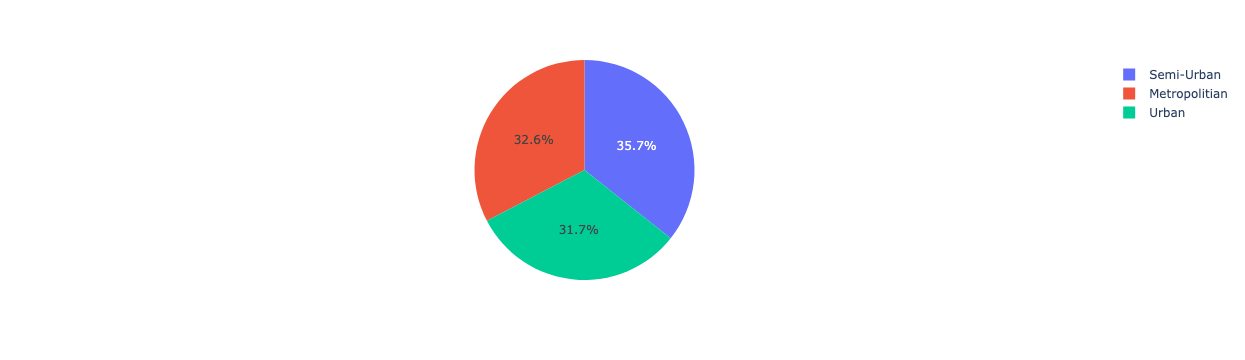

In [20]:
#1 -Desenhar um gráfico de pizza com a média de idade dos entregadores por cidade.
df2 = df1.loc[:, ['Delivery_person_Age', 'City']].groupby('City').mean().reset_index()
df2
#criação de uma nova coluna chamada media_idade:
df2['media_idade'] = df2['Delivery_person_Age']/df2['Delivery_person_Age'].sum()
df2

#Desenhar o gráfico de pizza
px.pie(df2, values = 'media_idade', names= 'City')




In [35]:
#2- Desenhe um gráfico de linha, mostrando o número total de entregas diárias feitas por densidade de tráfego igual a “Low” e “Jam”

#segemntação


df1['trafego_low_jam'] = df1['Road_traffic_density'] == 'low', 'jam'
df2= df1.loc[:, ['ID', 'trafego_low_jam']].groupby('trafego_low_jam').count().reset_index()
df2
px.line(df2, x='ID', y='Road_traffic_density')



ValueError: Length of values (2) does not match length of index (41419)

IndexingError: Too many indexers